# 1. Download the [cow teat datasets](https://github.com/YoushanZhang/SCTL)

In [73]:
import numpy as np 
import os
from skimage import feature as ft 
import skimage.io as io
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from skimage import color
from skimage.feature import hog
from sklearn import svm
from PIL import Image
import os, os.path

In [83]:
# traing set name list
path_tr = 'SCTL-main\\Train\\'
name_train = os.listdir(path_tr)
# training set lable and images
train_class = []
imtrain =[]
for i in range(1,5):
    path = r'SCTL-main\Train_org\Score_'+str(i)
    for k in os.listdir(path):
        if os.path.isfile(os.path.join(path,k)):
            train_class.append(i)
            imtrain.append(Image.open(os.path.join(path,k)))
# name_train = os.listdir(path)
print(len(train_class),len(imtrain),len(name_train))

1149 1149 1149


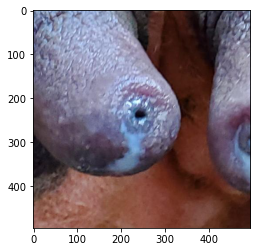

In [76]:
plt.imshow(imtrain[0])

In [84]:
# testing set name list
path_te = 'SCTL-main\\Test\\'
name_test = os.listdir(path_te)
# testing set images
imtest =[]
path = r'SCTL-main\Test'
for k in os.listdir(path):
    if os.path.isfile(os.path.join(path,k)):
        imtest.append(Image.open(os.path.join(path,k)))
print(len(imtest), len(name_test))

380 380


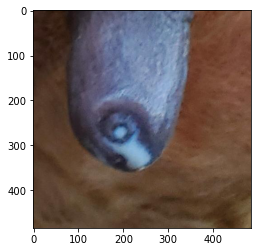

In [85]:
plt.imshow(imtest[0])

# 2. Extract features of training and test images using HOG
Please print the size of extracted features, e.g., training features: 1149 * d, test features: 380 *d

In [70]:
def hog_feature(img):
    img = np.array(img) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (256,256))
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)
    return(hog_image, fd)

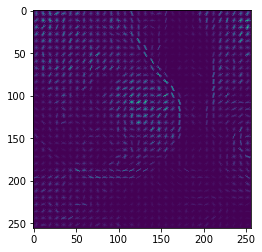

In [71]:
plt.imshow(hog_feature(imtrain[0])[0])

In [87]:
hog_train =[]
for i in imtrain:
    hog_train.append(hog_feature(i)[1])
hog_train

[array([0.25219818, 0.14353881, 0.03009533, ..., 0.09542528, 0.02303693,
        0.06515829]),
 array([0.25606007, 0.17541258, 0.07128686, ..., 0.1488053 , 0.09472515,
        0.11247708]),
 array([0.10623935, 0.07050902, 0.06312517, ..., 0.23235709, 0.2398609 ,
        0.14703388]),
 array([0.235078  , 0.13094441, 0.16516148, ..., 0.25313419, 0.20698716,
        0.16511678]),
 array([0.1078427 , 0.21505719, 0.08025864, ..., 0.13327294, 0.28421578,
        0.05363478]),
 array([0.28187652, 0.28046593, 0.13796184, ..., 0.1476899 , 0.18877897,
        0.20540431]),
 array([0.2489431 , 0.09066479, 0.14335359, ..., 0.08756456, 0.09576096,
        0.12028108]),
 array([0.16999461, 0.12800228, 0.11398911, ..., 0.10185103, 0.10842226,
        0.10296865]),
 array([0.2248357 , 0.17365167, 0.11733094, ..., 0.21020083, 0.12314036,
        0.18384878]),
 array([0.28144145, 0.24263106, 0.20365697, ..., 0.05390864, 0.06545752,
        0.04625195]),
 array([0.14181331, 0.06994606, 0.10936639, ..., 0

In [88]:
len(hog_train[0]),len(hog_train[1])

(34596, 34596)

In [89]:
hog_test =[]
for i in imtest:
    hog_test.append(hog_feature(i)[1])
hog_test

[array([0.24815492, 0.01528269, 0.22499698, ..., 0.02473273, 0.02085514,
       0.16266235]), array([0.12328525, 0.18364314, 0.04053919, ..., 0.24150463, 0.03052321,
       0.04956992]), array([0.2460439 , 0.08203322, 0.11626577, ..., 0.10036107, 0.06800776,
       0.03205917]), array([0.18541966, 0.03180932, 0.0400758 , ..., 0.17486398, 0.11581087,
       0.08189065]), array([0.22408001, 0.09500424, 0.10178241, ..., 0.10331978, 0.21657366,
       0.16118945]), array([0.24671486, 0.22745741, 0.24671486, ..., 0.20363837, 0.05322424,
       0.12434075]), array([0.11197254, 0.13498802, 0.12088866, ..., 0.17770168, 0.09731012,
       0.        ]), array([0.24408229, 0.18006806, 0.08733544, ..., 0.08431187, 0.05849487,
       0.01619569]), array([0.25667778, 0.08447472, 0.09622519, ..., 0.03385024, 0.21865152,
       0.10490479]), array([0.22888083, 0.11548503, 0.04686478, ..., 0.14344084, 0.16297453,
       0.06376155]), array([0.18240242, 0.13341339, 0.10309674, ..., 0.11855528, 0.1245112

In [90]:
len(hog_test[0]),len(hog_test[1])

(34596, 34596)

# 3. Extract features of training and test images using SIFT

In [130]:
def sift_feature(img):
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img, (256,256))
    sift = cv2.SIFT_create()
    keypoints,descriptors = sift.detectAndCompute(img, None)
    img = cv2.drawKeypoints(img_gray,keypoints, None)
    des =[]
    for i in descriptors:
        des.append(i)
    return(img, des)

In [131]:
sift_feature(imtrain[0])[1]

[array([100., 150.,   8.,   4.,   3.,   1.,   0.,   0., 126., 150.,   4.,
          0.,   0.,   0.,   1.,   7.,  46., 107.,   6.,   0.,   0.,   2.,
          9.,  22.,  46.,  56.,  15.,   8.,  12.,  16.,  38.,  52., 126.,
         88.,   9.,   2.,   0.,   0.,   0.,   6., 150.,  83.,   0.,   0.,
          0.,   4.,  14.,  91.,  56.,  63.,   3.,   0.,  10.,  75.,  42.,
         45.,  14., 102.,  96.,  20.,   8.,  20.,   2.,   0.,  37.,   1.,
          0.,   0.,   0.,   0.,   0.,   8., 150.,  60.,   1.,   0.,   0.,
          1.,   1.,  34.,  90.,  52.,   5.,   1.,  16.,  60.,  19.,  15.,
          1.,   3.,  14.,  16.,  71.,  96.,  18.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  18.,   2.,   0.,   0.,   0.,   0.,
          0.,   5.,  36.,  12.,  16.,   3.,   1.,   2.,   3.,  10.,   2.,
          2.,  13.,  11.,  54.,  51.,   4.,   4.], dtype=float32),
 array([ 31.,   6.,   7.,   9.,   2.,   3.,  21.,  38.,  27.,   8.,  14.,
        127., 133.,   0.,   0.,   9.,  65.,  

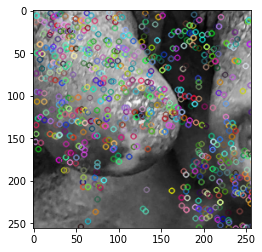

In [97]:
plt.imshow(sift_feature(imtrain[0])[0])

# 4. Extract features of training and test images using SURF

In [265]:
cv2.__version__

'4.6.0'

In [269]:
from platform import python_version

print(python_version())

3.9.12


#####  Non-free algorithms such as SURF are not included in these packages because they are patented / non-free and therefore cannot be distributed as built binaries. 

In [270]:
def surf_feature(img, path):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img, (256,256))
    surf = cv2.xfeatures2d.SURF_create()
    keypoints_surf, descriptors = surf.detectAndCompute(img, None)
    img = cv2.drawKeypoints(img, keypoints, None)
    # save SURF images
    filename = str(np.sum(img))
    cv2.imwrite('SCTL-main/SURF/'+path+filename+'.jpg',img)
    return(img)

In [271]:
for i in imtrain:
    path_tr = 'Train/'
    surf_feature(i, path_tr)

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [ ]:
for i in imtest:
    path_te = 'Test/'
    surf_feature(i, path_te)

# 5. Call SVM and kNN from scikit-learn and train the extracted HOG, SIFT and SURF features, respectively

## 5.1.0 HOG train and test data set

In [110]:
# prepare training and testing data
hog_train = np.array(hog_train)
hog_frame = pd.DataFrame(hog_train)
hog_frame['lables']= train_class
# set x_train, y_train and x_test
x_train = hog_frame.drop(["lables"],axis=1)
y_train = hog_frame["lables"].ravel() 
x_test = pd.DataFrame(np.array(hog_test))

## 5.1.1 HOG-SVM

In [101]:
clf = svm.SVC(kernel = "linear")
model_svm = clf.fit(x_train,y_train)
preds = model_svm.predict(x_test)
preds

array([1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2,
       3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,

In [106]:
import pandas as pandasForSortingCSV
hog_svm = pd.DataFrame(list(zip(name_test,preds)))

hog_svm.to_csv("HOG_SVM.csv", index = False, header = False)

### Accuracy is 27.3684%

## 5.1.2 HOG-KNN

In [108]:
clf = KNeighborsClassifier(n_neighbors=3)
model_knn = clf.fit(x_train, y_train)
preds = model_knn.predict(x_test)
preds

array([2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3,
       3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 1, 2, 3, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 3, 2, 1, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 1, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 1, 3,
       2, 2, 1, 3, 2, 2, 2, 3, 2, 1, 1, 1, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 3, 2,

In [109]:
import pandas as pandasForSortingCSV
hog_knn = pd.DataFrame(list(zip(name_test,preds)))

hog_knn.to_csv("HOG_KNN.csv", index = False, header = False)

### Accuracy is 24.4737%

## 5.2.0 SIFT train and test data set

In [ ]:
for i in imtrain:
    all_descriptorsn =[]
    des =[]
    desc=sift_feature(imtrain[0])[1]
    des.append(sift_feature(imtrain[0])[1])
    for d in desc:
        sift_train.append(d)
    all_descriptors = np.array(sift_train)

In [ ]:
# prepare training and testing data
hog_train = np.array(hog_train)
hog_frame = pd.DataFrame(hog_train)
hog_frame['lables']= train_class
# set x_train, y_train and x_test
x_train = hog_frame.drop(["lables"],axis=1)
y_train = hog_frame["lables"].ravel() 
x_test = pd.DataFrame(np.array(hog_test))

## 5.2.1 SIFT-SVM

In [137]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

In [141]:
def kmeans_bow(all_descriptors, num_clusters):
    bow_dict = []
    kmeans = KMeans(n_clusters=num_clusters).fit(all_descriptors)
    bow_dict = kmeans.cluster_centers_
    return bow_dict

num_clusters = 100
if not os.path.isfile('SCTL-main/bow_dictionary150.pkl'):
    BoW = kmeans_bow(all_descriptors, num_clusters)
    pickle.dump(BoW, open('SCTL-main/bow_dictionary150.pkl', 'wb'))
else:
    BoW = pickle.load(open('SCTL-main/bow_dictionary150.pkl', 'rb'))
    
def create_features_bow(image_descriptors, BoW, num_clusters):
    X_features = []
    for i in range(len(image_descriptors)):
        features = np.array([0] * num_clusters)

        if image_descriptors[i] is not None:
            distance = cdist(image_descriptors[i], BoW)
            argmin = np.argmin(distance, axis=1)
            for j in argmin:
                features[j] += 1
        X_features.append(features)
    return X_features

X_features = create_features_bow(des, BoW, num_clusters)
X_train = [] 
X_test = []
Y_train = []
Y_test = []
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y, test_size=0.2, random_state=42)
svm = sklearn.svm.SVC(C = 10)
svm.fit(X_train, Y_train)

#Thu predict 
img_test = cv2.imread('Traffic-Data/image_test/car.png')
img = [img_test]
img_sift_feature = extract_sift_features(img)
img_bow_feature = create_features_bow(img_sift_feature, BoW, num_clusters)
preds = svm.predict(img_bow_feature)

sift_svm = pd.DataFrame(list(zip(name_test,preds)))

sift_svm.to_csv("SIFT_KNN.csv", index = False, header = False)

KeyboardInterrupt: 

# 6. Report the accuracy using Cow_teat_classfication_accuracy software, please attach the results image here

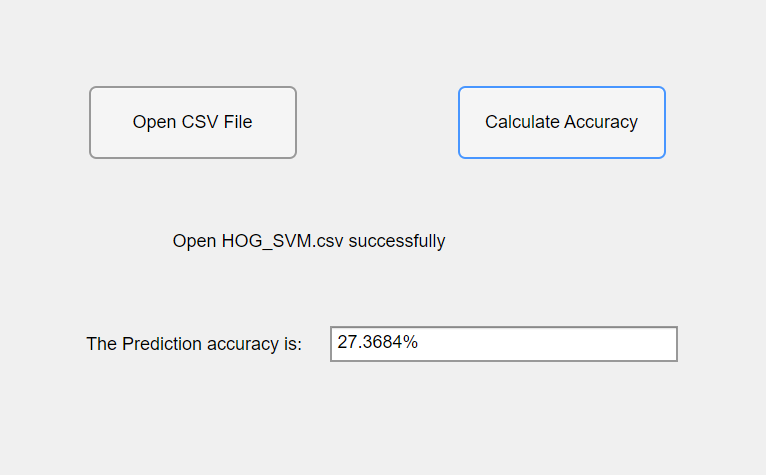

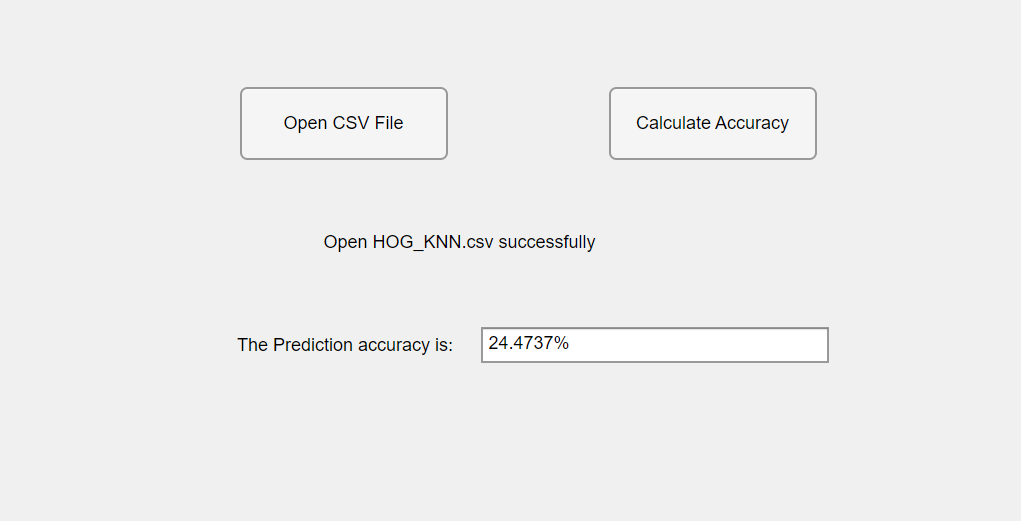